Public Transport Ridership Trends

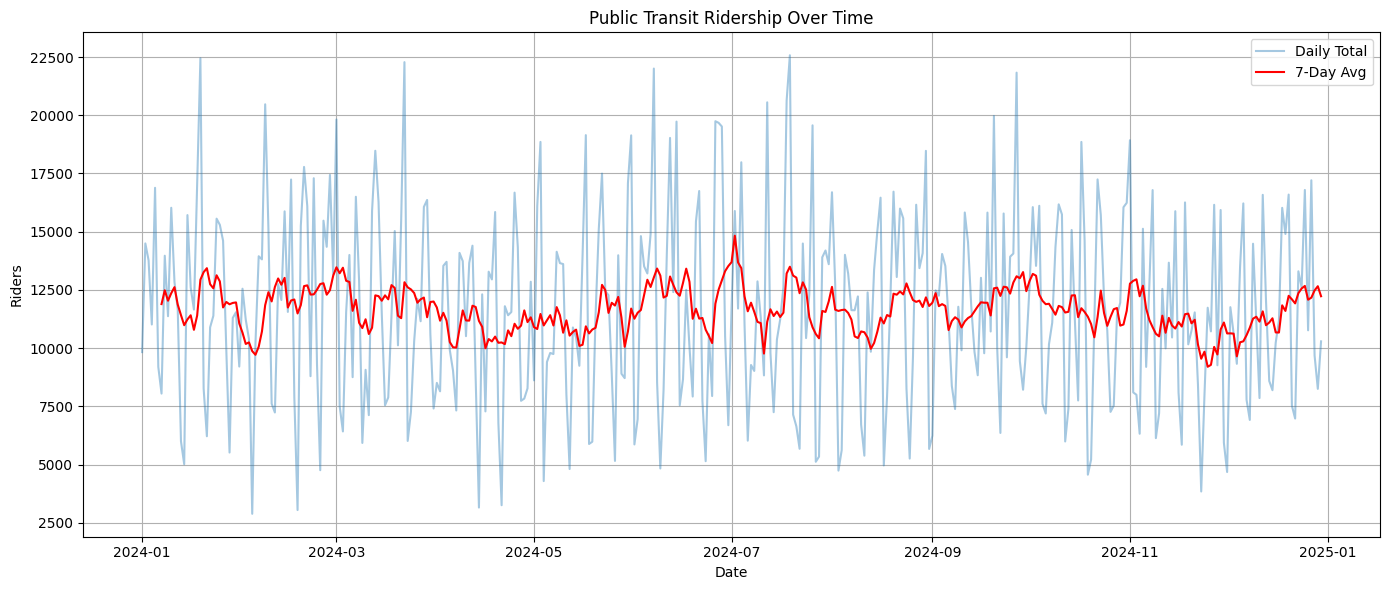

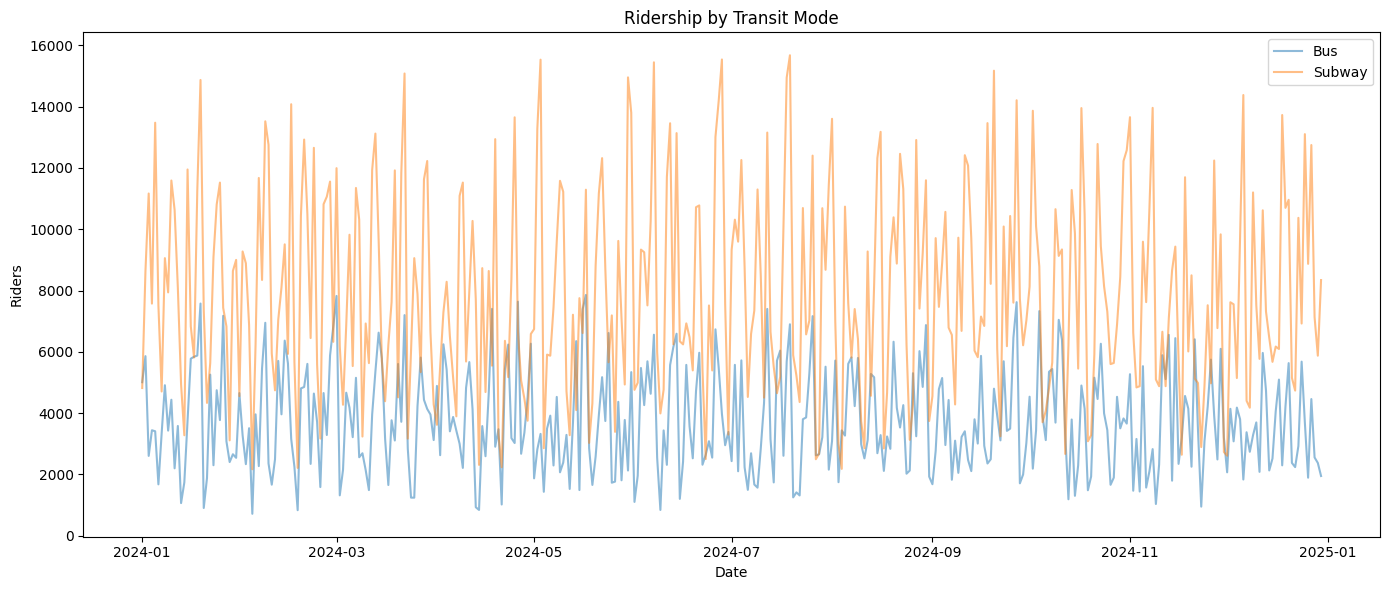

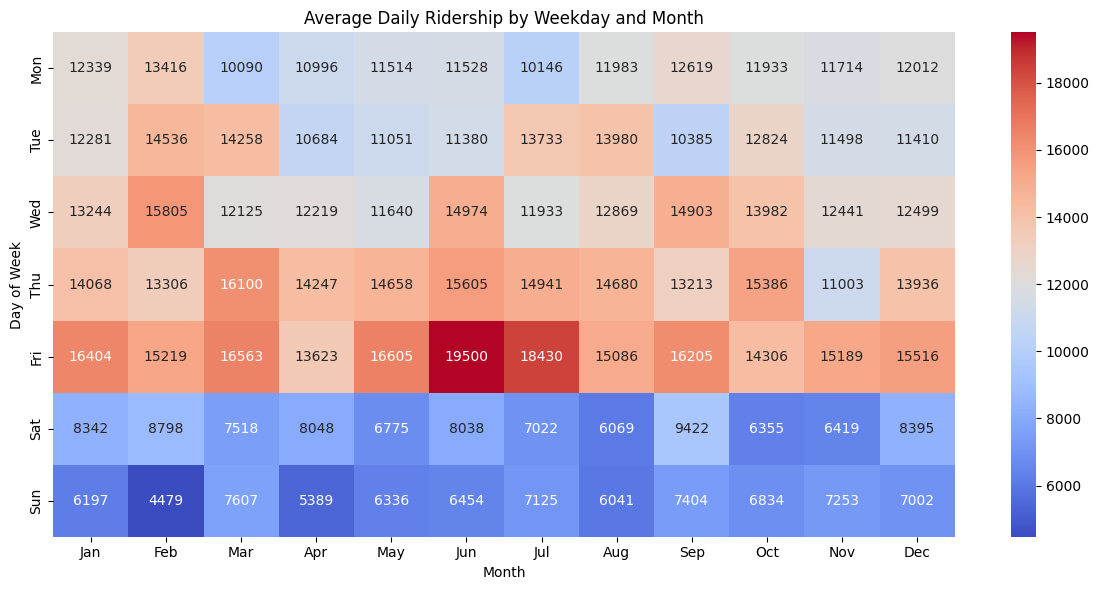

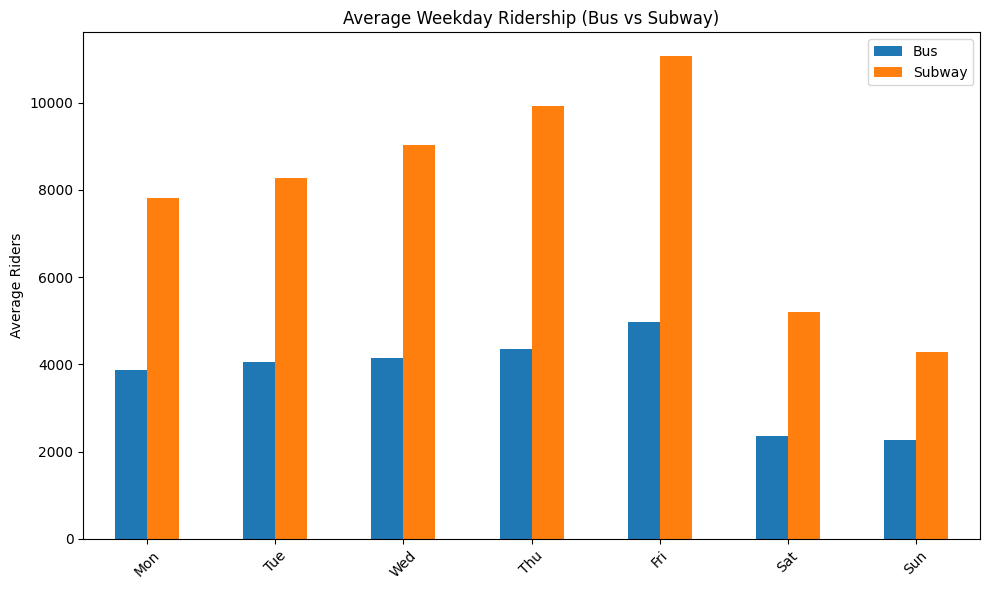

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 1 year of ridership data
np.random.seed(42)
date_range = pd.date_range(start="2024-01-01", periods=365, freq='D')

# Simulate patterns: bus and subway with weekday peaks and weekend dips
bus_riders = np.random.randint(1000, 5000, size=365)
subway_riders = np.random.randint(3000, 10000, size=365)

# Add weekly fluctuation
weekly_wave = np.tile([1.2, 1.3, 1.4, 1.5, 1.6, 0.8, 0.7], 53)[:365]
bus_riders = bus_riders * weekly_wave
subway_riders = subway_riders * weekly_wave

df_transit = pd.DataFrame({
    'Date': date_range,
    'Bus': bus_riders,
    'Subway': subway_riders
})
df_transit['Total'] = df_transit['Bus'] + df_transit['Subway']
df_transit['Weekday'] = df_transit['Date'].dt.dayofweek
df_transit['Month'] = df_transit['Date'].dt.month
df_transit['Rolling_Total'] = df_transit['Total'].rolling(window=7).mean()

# 📈 Total Ridership Over Time
plt.figure(figsize=(14, 6))
plt.plot(df_transit['Date'], df_transit['Total'], alpha=0.4, label='Daily Total')
plt.plot(df_transit['Date'], df_transit['Rolling_Total'], color='red', label='7-Day Avg')
plt.title('Public Transit Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Riders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🚍 Mode Split Over Time
plt.figure(figsize=(14, 6))
plt.plot(df_transit['Date'], df_transit['Bus'], label='Bus', alpha=0.5)
plt.plot(df_transit['Date'], df_transit['Subway'], label='Subway', alpha=0.5)
plt.title('Ridership by Transit Mode')
plt.xlabel('Date')
plt.ylabel('Riders')
plt.legend()
plt.tight_layout()
plt.show()

# 🔥 Heatmap - Day of Week vs Month
heatmap_data = df_transit.pivot_table(values='Total', index='Weekday', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f',
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Average Daily Ridership by Weekday and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# 📊 Weekly Pattern: Average Ridership by Day
weekly_avg = df_transit.groupby('Weekday')[['Bus', 'Subway']].mean()
weekly_avg.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekly_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Weekday Ridership (Bus vs Subway)')
plt.ylabel('Average Riders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()